In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.fftpack
import glob,os
import gwPaPa_func as gwpapa

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skimage.util.shape import view_as_windows

import tensorflow as tf
from tensorflow import keras

import pickle
from pycbc import frame,types
import timeit

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
###timer
start = timeit.default_timer()

In [3]:
BNS_test_path='data_BNS'
BNS_check_path='data_BNS_check'
BBH_test_path='data_BBH'
BBH_check_path='data_BBH_check'

In [4]:
injections_BNS = pickle.load(open(BNS_test_path+'/injections-BNS.p', "rb"))
injections_BBH = pickle.load(open(BBH_test_path+'/injections-BBH.p', "rb"))
injections_BNS_check = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
injections_BBH_check = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

In [169]:
injections_BNS[2]

[{'sim-id': 'BNS-3',
  'mass_1': 1.361394876088353,
  'mass_2': 1.253389357877929,
  'S1x': 0.0,
  'S1y': 0.0,
  'S1z': 0.0,
  'S2x': 0.0,
  'S2y': 0.0,
  'S2z': 0.0,
  'distance': 1000.0,
  'inclination': 0.0,
  'right_ascension': 0.3,
  'declination': -0.4,
  'psi': 0.0,
  'phiRef': 0.0,
  'lambda1': 0.0,
  'lambda2': 0.0,
  'f_min': 20.0,
  'f_ref': 20.0,
  'deltaT': 0.000244140625,
  'start_time': 759,
  'duration': 245},

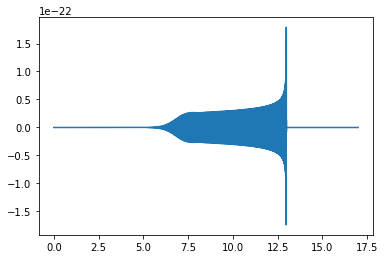

In [168]:
sample_rate=4096
t=np.arange(0,400,1/sample_rate)

try:
    d0 =injections_BBH[2][1]
    t0 = np.arange(0,len(d0)/sample_rate,1/sample_rate)
    plt.plot(t0,d0)
    plt.show()
except:
    pass

In [7]:
num_BNS_injections=len(injections_BNS)
num_BBH_injections=len(injections_BBH)

print(num_BNS_injections)
print(num_BBH_injections)
print(len(injections_BNS_check))
print(len(injections_BBH_check))


BNS_data=[]
BBH_data=[]
BNS_check_data=[]
BBH_check_data=[]
train_labels=[]
check_labels=[]
t0=50
tl=1

for i in range(len(injections_BNS)):
    d = np.array(injections_BNS[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_data.append(gwpapa.twindow(t,d,t0,tl))
    train_labels.append(1)
    
for i in range(len(injections_BNS_check)):
    d = np.array(injections_BNS_check[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_check_data.append(gwpapa.twindow(t,d,t0,tl))
    check_labels.append(1)
 
t0=7
tl=1

for i in range(len(injections_BBH)):
    d = np.array(injections_BBH[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_data.append(gwpapa.twindow(t,d,t0,tl))
    train_labels.append(0)
    
for i in range(len(injections_BBH_check)):
    d = np.array(injections_BBH_check[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_check_data.append(gwpapa.twindow(t,d,t0,tl))
    check_labels.append(0)

print('done')

180
180
20
20
done


In [8]:
print(BNS_data)
print(len(BNS_data))
print(len(BBH_data[0]),len(BBH_data[1]))
print(BBH_data)

[array([-5.31160811e-25, -5.18380959e-25, -5.05147085e-25, ...,
        3.34305118e-25,  3.16466307e-25,  2.98330399e-25]), array([4.16018917e-25, 4.38817114e-25, 4.61100203e-25, ...,
       2.35788887e-26, 4.99558353e-26, 7.61807129e-26]), array([-4.62009039e-25, -4.76726619e-25, -4.91008399e-25, ...,
        6.35460334e-25,  6.42426025e-25,  6.48817923e-25]), array([-8.08501157e-25, -8.06473487e-25, -8.03804289e-25, ...,
       -4.60983341e-25, -4.81088428e-25, -5.00850309e-25]), array([-2.82223294e-26, -2.75038202e-27,  2.26190456e-26, ...,
       -6.36721277e-25, -6.19822529e-25, -6.02450142e-25]), array([6.59707800e-25, 6.74235928e-25, 6.88039044e-25, ...,
       2.68535291e-26, 5.19269418e-26, 7.68529766e-26]), array([-8.05438520e-25, -8.19216155e-25, -8.32289891e-25, ...,
       -9.30052418e-25, -9.29429537e-25, -9.27994127e-25]), array([-6.53262444e-25, -6.58909238e-25, -6.64008498e-25, ...,
        6.80992913e-25,  6.78795409e-25,  6.75940558e-25]), array([-6.28123146e-25, -6.

0.0 0.99951171875


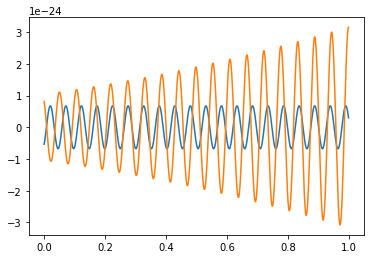

[8.17946428e-25 8.00289893e-25 7.81999660e-25 ... 3.15115465e-24
 3.15484124e-24 3.15613873e-24]


In [9]:
t=np.arange(0,len(BNS_data[0])/sample_rate,1/sample_rate)
t2=np.arange(0,len(BBH_data[0])/sample_rate,1/sample_rate)
print(0.0,max(t))
plt.plot(t,BNS_data[0])
plt.plot(t2,BBH_data[0])
plt.show()

print(BBH_data[0])

In [11]:
class_names=["BNS","BBH"]


In [30]:
BNS_data=np.array(BNS_data)
BBH_data=np.array(BBH_data)
BNS_check_data=np.array(BNS_check_data)
BBH_check_data=np.array(BBH_check_data)
train_labels=np.array(train_labels)
check_labels=np.array(check_labels)
BNS_data.shape
BBH_data.shape
train_labels=np.array(train_labels)
BNS_check_data.shape
BBH_check_data.shape

train_data=np.concatenate((BNS_data,BBH_data),axis=0)
check_data=np.concatenate((BNS_check_data,BBH_check_data),axis=0)


train_data = train_data / np.linalg.norm(train_data)
check_data = check_data / np.linalg.norm(check_data)

train_data.shape
#print(BNS_data.type)

print(train_data.dtype)

float64


In [154]:
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

print(model)

In [155]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model)
print(train_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [156]:
model.fit(train_data, train_labels, epochs=50)

Epoch 1/50
360/360 [==============================] - 1s 2ms/step - loss: 0.6915 - acc: 0.5306
Epoch 2/50
360/360 [==============================] - 0s 659us/step - loss: 0.6765 - acc: 0.6611
Epoch 3/50
360/360 [==============================] - 0s 636us/step - loss: 0.6573 - acc: 0.8250
Epoch 4/50
360/360 [==============================] - 0s 686us/step - loss: 0.6339 - acc: 0.8250
Epoch 5/50
360/360 [==============================] - 0s 730us/step - loss: 0.6101 - acc: 0.8472
Epoch 6/50
360/360 [==============================] - 0s 631us/step - loss: 0.5827 - acc: 0.8472
Epoch 7/50
360/360 [==============================] - 0s 614us/step - loss: 0.5546 - acc: 0.8389
Epoch 8/50
360/360 [==============================] - 0s 855us/step - loss: 0.5279 - acc: 0.8361
Epoch 9/50
360/360 [==============================] - 0s 771us/step - loss: 0.5007 - acc: 0.8361
Epoch 10/50
360/360 [==============================] - 0s 757us/step - loss: 0.4730 - acc: 0.8389
Epoch 11/50
360/360 [==========

In [157]:
test_loss, test_acc = model.evaluate(check_data,check_labels)

print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

40/40 [==============================] - 0s 6ms/step
Test accuracy: 1.0
Test Loss: 0.08985842466345843


In [158]:
stop = timeit.default_timer()

In [159]:
acttime=stop - start

print(str(acttime)+' seconds')
print(0.0,str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

13055.714698901 seconds
0.0 217.59524498168332 minutes
3.6265874163613887 hours


In [160]:
predictions = model.predict(check_data)

In [161]:
print(predictions[0],predictions[-1])
print(check_labels[0],check_labels[-1])
#print(t)

[0.14454277 0.8554572 ] [9.9999976e-01 1.9396472e-07]
1 0


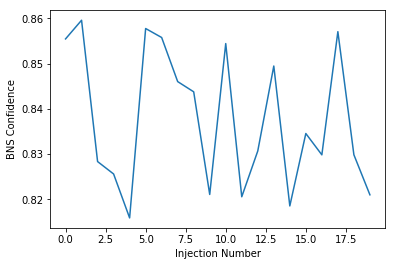

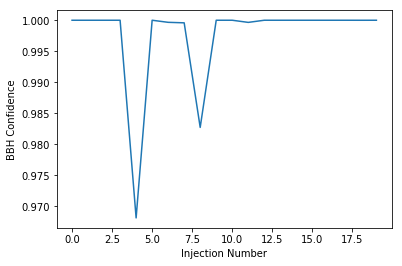

In [162]:
plt.plot(predictions[0:20,1])
#plt.plot(predictions[:,1])
plt.ylabel('BNS Confidence')
plt.xlabel('Injection Number')
plt.show()

plt.plot(predictions[20:40,0])
#plt.plot(predictions[:,1])
plt.ylabel('BBH Confidence')
plt.xlabel('Injection Number')
plt.show()